# Introduction

In this notebook, we implement [YOLOv4](https://arxiv.org/pdf/2004.10934.pdf) for training on your own dataset in PyTorch.

We also recommend reading our blog post on [Training YOLOv4 on custom data](https://blog.roboflow.ai/training-yolov4-on-a-custom-dataset/) side by side.

We will take the following steps to implement YOLOv4 on our custom data:
* Set up YOLOv4 environment
* Download Custom Dataset via Roboflow
* Train Custom YOLOv4 detector
* Reload Custom YOLOv4 detector weights for inference

When you are done you will have a custom detector that you can use. It will make inference like this:

#### ![Chesse Image](https://i.imgur.com/cGOxffX.png)

### **Reach out for support**

If you run into any hurdles on your own data set or just want to share some cool results in your own domain, [reach out!](https://roboflow.ai/contact) 


#### ![Roboflow Workmark](https://i.imgur.com/WHFqYSJ.png)

# Set up YOLOv4 Environment

In [1]:
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git

fatal: destination path 'pytorch-YOLOv4' already exists and is not an empty directory.


In [ ]:
%cd /content/pytorch-YOLOv4
!pip install -r requirements.txt
# This restarts the runtime--ignore any error messages
import os
os.kill(os.getpid(), 9)

/content/pytorch-YOLOv4


In [1]:
# download yolov4 weights that have already been converted to PyTorch
%cd /content/pytorch-YOLOv4/cfg/
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

/content/pytorch-YOLOv4/cfg
Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth
100% 170M/170M [00:01<00:00, 167MB/s]


# Download Custom Dataset

## Export Your Dataset from Roboflow

Roboflow enables you to export your dataset in any format you need - including for this notebook.

Create a [free account](https://app.roboflow.ai). Upload your private dataset. Generate a version (applying any preprocessing and augmentations you desire). Create an export. Select **YOLOv4 PyTorch** as the export format. Click **"Show Download code"**, copy your link, and paste it in the next cell. Magic.

In [2]:
%cd /content/
# REPLACE this link with your Roboflow dataset (export as YOLOv4 PyTorch format)
!curl -L "https://app.roboflow.com/ds/2dya7ERLcN?key=wMfYH7jvjO" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1878      0 --:--:-- --:--:-- --:--:--  1878
100 39.1M  100 39.1M    0     0  44.6M      0 --:--:-- --:--:-- --:--:--  243M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/C80_D2_P3_jpg.rf.dc44bf039e01f7dd6d5bd7053caf62fd.jpg  
 extracting: test/C80_D2_P4_jpg.rf.3cd59e02139d219b3f786a030f90f755.jpg  
 extracting: test/C81_D1_P2_jpg.rf.ff09de4141935d82badd985236a0ae6a.jpg  
 extracting: test/C84_D2_P3_jpg.rf.b0da415703fe79fe1c35a0e50f0507de.jpg  
 extracting: test/C8_D1_P4_jpg.rf.bae714343ba5367cd10f6134fb26dade.jpg  
 extracting: test/C8_D2_P2_jpg.rf.886bf0ae45439a33580475465f4eb882.jpg  
 extracting: test/C8_D2_P3_jpg.rf.1b6b7f70ae017957127be8abb860b16f.jpg  
 extracting: test/C98_D1_P2_jpg.rf.59b44ca

In [3]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

In [4]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [5]:
print(num_classes)

15


# Train Custom Detector

In [6]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python ./pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 30

log file path:log/log_2022-01-10_09-05-41.txt
2022-01-10 09:05:41,439 train.py[line:435] INFO: Using device cuda
2022-01-10 09:05:43,913 train.py[line:282] INFO: Starting training:
        Epochs:          30
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   921
        Validation size: 67
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 15
        Train label path:train.txt
        Pretrained:
    
Epoch 1/30:   0%|        | 0/921 [00:00<?, ?img/s]/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/30:   4%| | 38/921 [00:23<07:27,  1.97img//usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler,

# Load Trained Weights for Custom Detection

You can also use this to load previously saved weights!

In [7]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch10.pth  Yolov4_epoch14.pth	Yolov4_epoch3.pth  Yolov4_epoch7.pth
Yolov4_epoch11.pth  Yolov4_epoch15.pth	Yolov4_epoch4.pth  Yolov4_epoch8.pth
Yolov4_epoch12.pth  Yolov4_epoch1.pth	Yolov4_epoch5.pth  Yolov4_epoch9.pth
Yolov4_epoch13.pth  Yolov4_epoch2.pth	Yolov4_epoch6.pth


In [14]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [15]:
%%time
##change the epoch here to the one you would like to use for inference
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch15.pth {img_path} test/_classes.txt

diode-light_emitting: 0.855107
voltage-dc: 0.983913
text: 0.999999
text: 0.999986
diode: 0.878672
crossover: 0.997237
diode-light_emitting: 0.932529
text: 0.999787
crossover: 0.992106
junction: 0.999983
diode: 0.990196
text: 0.999996
junction: 1.000000
junction: 1.000000
junction: 0.999997
resistor: 0.989205
text: 0.991235
junction: 1.000000
junction: 1.000000
text: 0.999952
text: 0.999869
junction: 1.000000
text: 0.999647
junction: 1.000000
junction: 0.999983
resistor: 0.964358
junction: 0.999997
capacitor-unpolarized: 0.990600
save plot results to predictions.jpg
CPU times: user 40 ms, sys: 10.8 ms, total: 50.8 ms
Wall time: 3.93 s


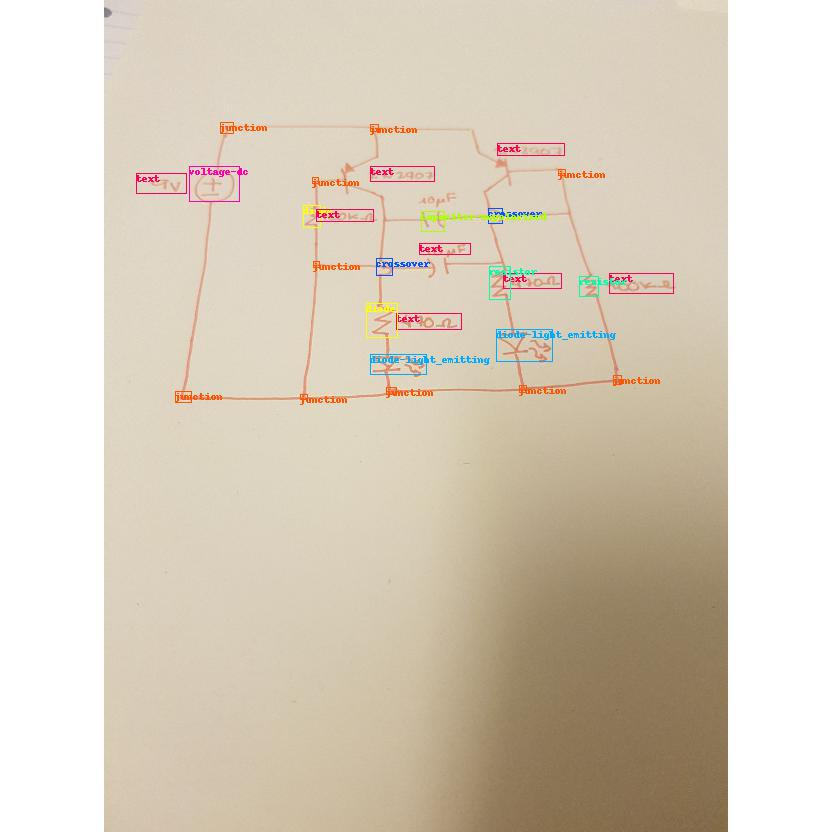

In [16]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')